<center><font size =12><b>Walmart Sales Analysis</b>


# **Introduction**

Walmart, one of the largest retail chains globally, generates vast amounts of sales data across various departments and stores. Analyzing this data is crucial for uncovering patterns, trends, and insights that drive informed business decisions.

In this project, we perform Exploratory Data Analysis (EDA) on historical sales data from Walmart stores. The goal is to understand sales trends, evaluate store performance, identify seasonality, and analyze the impact of external factors such as holidays and promotional markdowns.

By diving deep into the data, we aim to help Walmart optimize inventory, forecast future sales, and strategize better for peak seasons and promotions.

<center><img src="https://raw.githubusercontent.com/pramodm1609/raw_images/refs/heads/main/WalmartSalesImage.jpg" width='90%' height='50%'></p></center>

# **Problem Statement**

Walmart operates over 45 stores, each with multiple departments, and wants to improve its sales forecasting model. They need insights from historical sales data to:

- Understand sales trends across stores and departments.

- Analyze the impact of holidays and promotional markdowns on sales.

- Identify underperforming stores and departments.

- Detect seasonality and weekly patterns in sales data.

- Help business teams plan inventory and promotions efficiently.

Key Questions to Address in EDA:

- Which stores have the highest and lowest sales?

- How do holidays affect sales?

- Which departments perform best across different stores?

- What is the trend of weekly sales over time?

- Is there a correlation between promotional markdowns and sales?

# **Importing Libraries**

In [76]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# **Data Acquisition**

- The dataset consists of information about the Walmart sales.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 3203 | 21 | 734.42 kB |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--|
|1| Row ID | Row ID |
|2| Order ID | Order ID of the order |
|3| Order Date |	Date of Order  |
|4| Ship Date | Date of shipment |
|5| Ship Mode | Shipping mode |
|6| Customer ID |	Customer ID of the customer |
|7| Customer Name |	Name of customer |
|8| Segment |	Segement of customer |
|9| Country | Country where order is made |
|10| City | City where order is made |
|11| State |	State |
|12| Postal Code | Postal code |
|13| Region | Region |
|14| Product ID |	ID of the product |
|15| Category |	Category of product |
|16| Sub-Category |	Sub-Category of product |
|17| Product Name | Name of the product |
|18| Sales | Sales of the product |
|19| Quantity |	Quantity of the product sold |
|20| Discount | Discount applied on the product purchase |
|21| Profit | Profit made on the sale |

In [77]:
walmart_data = pd.read_csv('https://raw.githubusercontent.com/pramodm1609/Projects/refs/heads/main/EDA/Wallmart-Sales-Analysis-Project/Data/Walmart.csv')
print('Shape of the dataset:', walmart_data.shape)
walmart_data.head()

Shape of the dataset: (3203, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
1,6,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
2,7,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
3,8,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
4,9,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


# **Data Information**

**Checking missing values**

In [78]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         3203 non-null   int64  
 1   Order ID       3203 non-null   object 
 2   Order Date     3203 non-null   object 
 3   Ship Date      3203 non-null   object 
 4   Ship Mode      3203 non-null   object 
 5   Customer ID    3203 non-null   object 
 6   Customer Name  3203 non-null   object 
 7   Segment        3203 non-null   object 
 8   Country        3203 non-null   object 
 9   City           3203 non-null   object 
 10  State          3203 non-null   object 
 11  Postal Code    3203 non-null   int64  
 12  Region         3203 non-null   object 
 13  Product ID     3203 non-null   object 
 14  Category       3203 non-null   object 
 15  Sub-Category   3203 non-null   object 
 16  Product Name   3203 non-null   object 
 17  Sales          3203 non-null   float64
 18  Quantity

**Checking duplicates**

In [79]:
walmart_data.duplicated().value_counts()

,count
False,3203


# **Data Description**

In [80]:
walmart_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,4986.524508,91707.696534,226.493233,3.829535,0.109335,33.849032
std,2848.758232,5202.135433,524.876877,2.261270,0.146861,174.109081
min,3.000000,59102.000000,0.990000,1.000000,0.000000,-3399.980000
25%,2508.000000,90032.000000,19.440000,2.000000,0.000000,3.852000
50%,4988.000000,92105.000000,60.840000,3.000000,0.000000,11.166400
75%,7406.500000,94513.000000,215.809000,5.000000,0.200000,33.000400
max,9994.000000,99301.000000,13999.960000,14.000000,0.700000,6719.980800


# **Observations**

- Total 3203 records are there in the dataset
- No missing values are observed in the dataset
- No outliers are detected
- No duplicated rows were found
- Data type of order date and ship date column is not correct

# **Data Cleaning**

In [81]:
walmart_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [82]:
# Convert 'Order Date' column
walmart_data['Order Date'] = pd.to_datetime(walmart_data['Order Date'], format='mixed')


# Convert 'Ship Date' column
walmart_data['Ship Date'] = pd.to_datetime(walmart_data['Order Date'], format='mixed')

walmart_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,3,CA-2013-138688,2013-06-13,2013-06-13,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
1,6,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
2,7,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
3,8,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
4,9,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


In [83]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3203 non-null   int64         
 1   Order ID       3203 non-null   object        
 2   Order Date     3203 non-null   datetime64[ns]
 3   Ship Date      3203 non-null   datetime64[ns]
 4   Ship Mode      3203 non-null   object        
 5   Customer ID    3203 non-null   object        
 6   Customer Name  3203 non-null   object        
 7   Segment        3203 non-null   object        
 8   Country        3203 non-null   object        
 9   City           3203 non-null   object        
 10  State          3203 non-null   object        
 11  Postal Code    3203 non-null   int64         
 12  Region         3203 non-null   object        
 13  Product ID     3203 non-null   object        
 14  Category       3203 non-null   object        
 15  Sub-Category   3203 n

**Observations**
- Data type of **Order Date** and **Ship Date** column has been changed to datetime coloumn

In [84]:
# Profit/Loss label
import numpy as np
walmart_data['Profit/Loss'] = np.where(walmart_data['Profit'] >= 0, 'Profit', 'Loss')

# Extract Year, Month
walmart_data['Year'] = walmart_data['Order Date'].dt.year
walmart_data['Month'] = walmart_data['Order Date'].dt.month_name()
walmart_data['Day'] = walmart_data['Order Date'].dt.day

In [85]:
walmart_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit/Loss,Year,Month,Day
0,3,CA-2013-138688,2013-06-13,2013-06-13,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Profit,2013,June,13
1,6,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,Profit,2011,September,6
2,7,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Art,Newell 322,7.280,4,0.0,1.9656,Profit,2011,September,6
3,8,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,Profit,2011,September,6
4,9,CA-2011-115812,2011-09-06,2011-09-06,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,Profit,2011,September,6


# **Exploratory Data Analysis**

**Distribution of Sales**

Text(0.5, 1.0, 'Distribution of Sales')

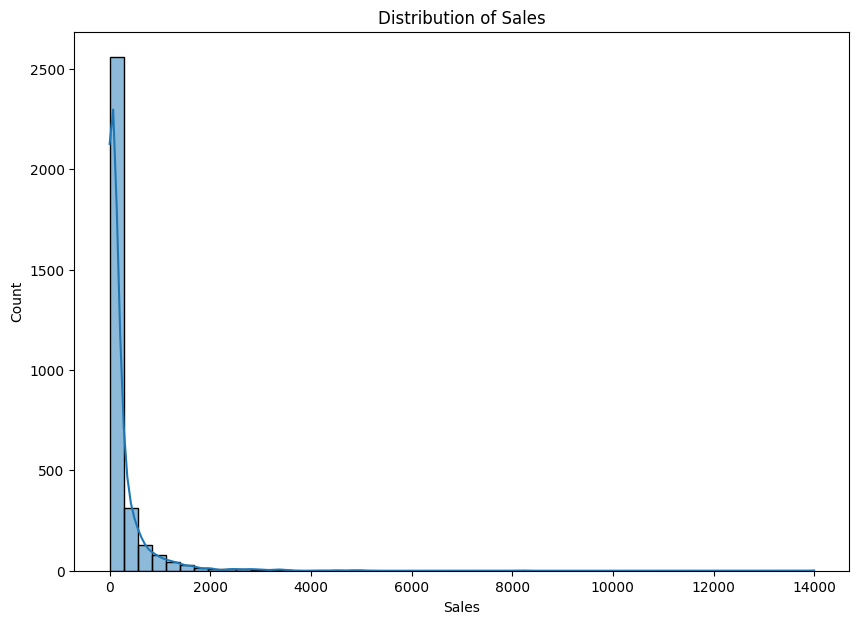

In [86]:
figure = plt.figure(figsize=(10,7))
sns.histplot(walmart_data['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")

**Distribution of Profit**

Text(0.5, 1.0, 'Distribution of Profit')

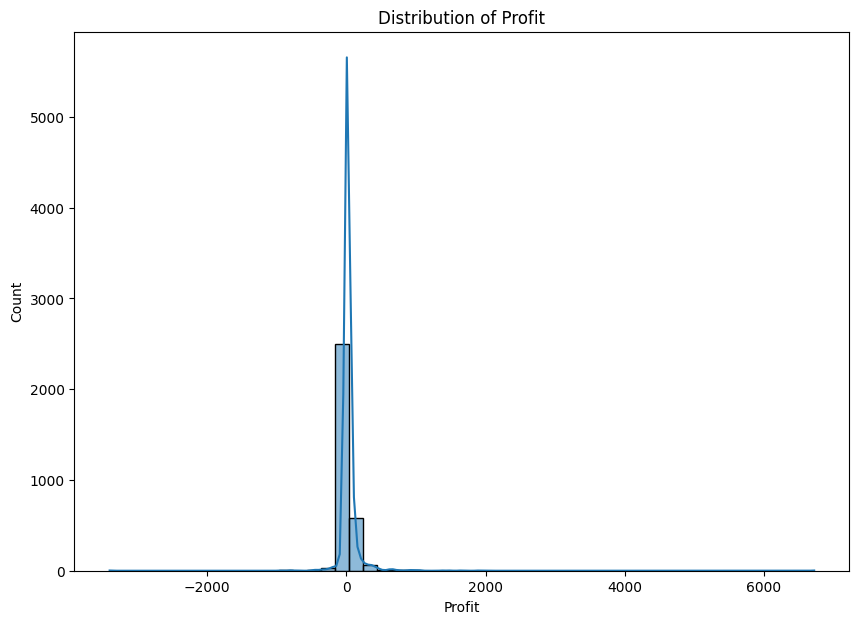

In [87]:
figure = plt.figure(figsize=(10,7))
sns.histplot(walmart_data['Profit'], bins=50, kde=True)
plt.title("Distribution of Profit")

**Total sales & profit by category**

Text(0.5, 1.0, 'Sales vs Profit by Category')

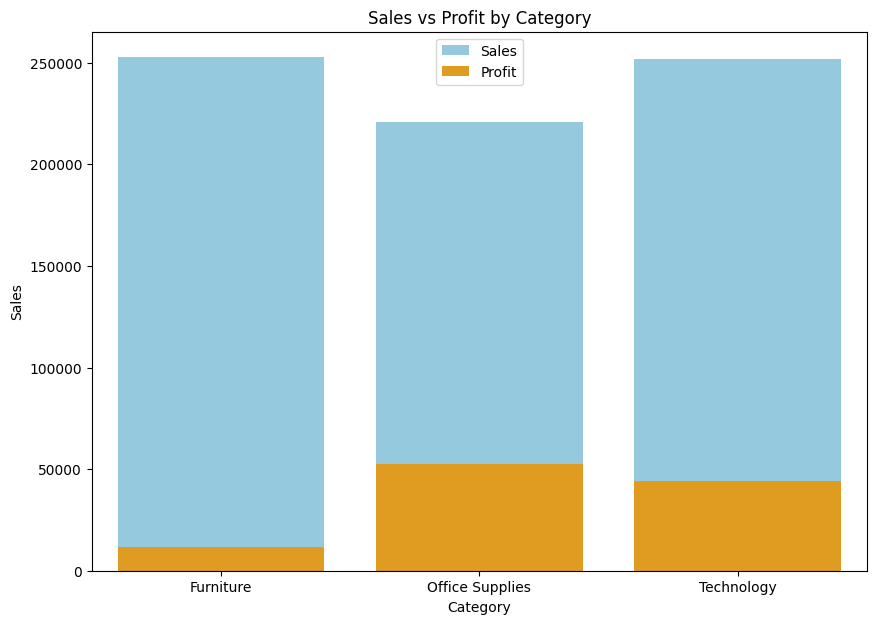

In [88]:
figure = plt.figure(figsize=(10,7))
category_summary = walmart_data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Bar plot
sns.barplot(data=category_summary, x='Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=category_summary, x='Category', y='Profit', color='orange', label='Profit')
plt.legend()
plt.title("Sales vs Profit by Category")

**Loss-Making Categories**

In [89]:
loss_data = walmart_data[walmart_data['Profit'] < 0]
loss_data.groupby('Category')['Profit'].sum().reset_index()

,Category,Profit
0,Furniture,-12657.9337
1,Office Supplies,-3626.3919
2,Technology,-6436.6353


**Region-Wise Performance**

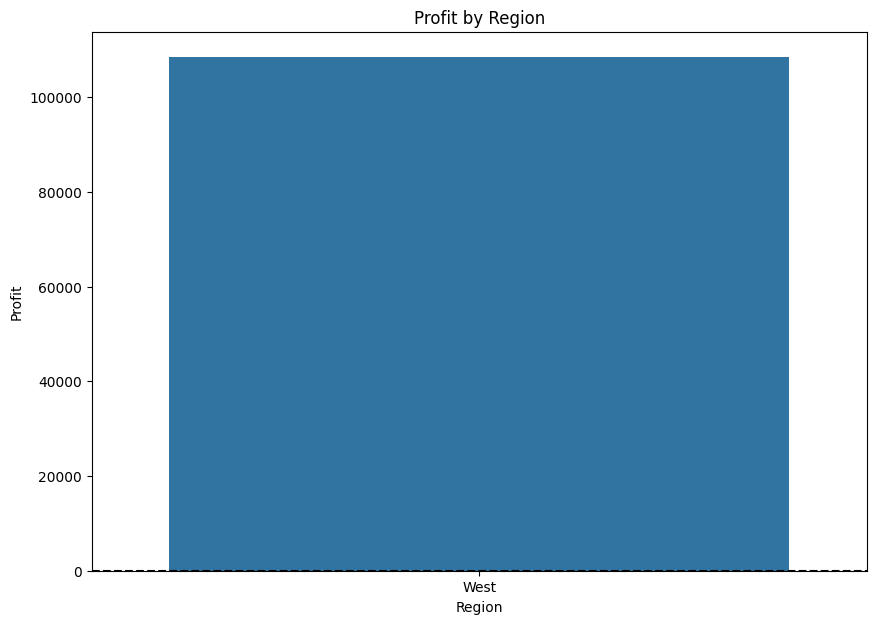

In [92]:
figure = plt.figure(figsize=(10,7))
sns.barplot(data=walmart_data.groupby('Region')['Profit'].sum().reset_index(), x='Region', y='Profit')
plt.title('Profit by Region')
plt.axhline(0, color='black', linestyle='--')

**Time Series Analysis**

Text(0.5, 0, 'Date')

<Figure size 1000x700 with 0 Axes>

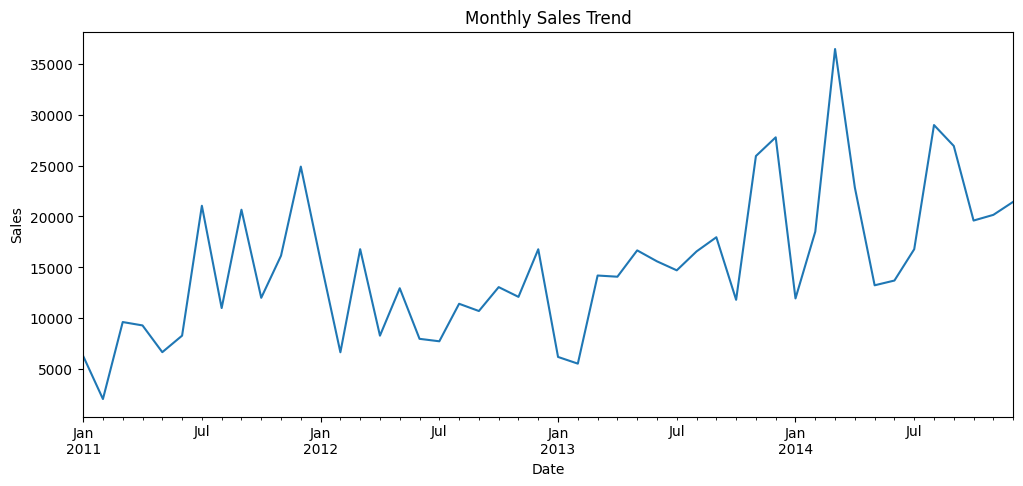

In [95]:
figure = plt.figure(figsize=(10,7))
monthly_sales = walmart_data.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Date")

**Top Products**

<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='Product Name'>

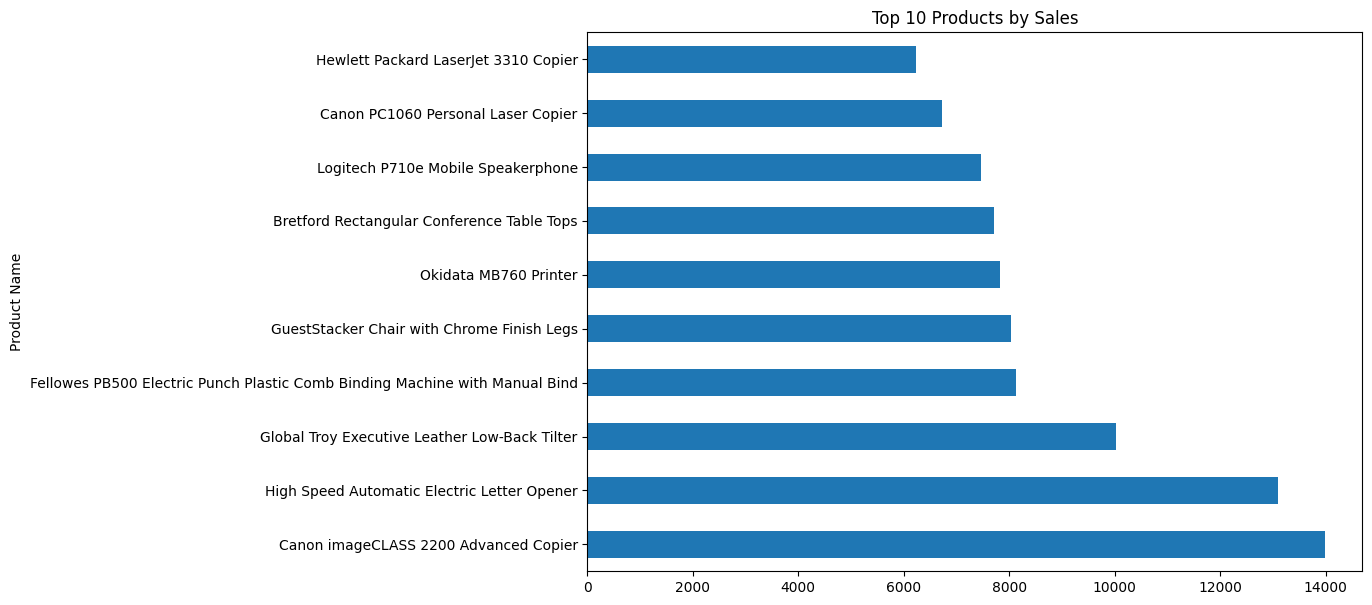

In [96]:
figure = plt.figure(figsize=(10,7))
top_products = walmart_data.groupby('Product Name')['Sales'].sum().nlargest(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales')


**Shipping Duration**

Text(0.5, 1.0, 'Shipping Time Distribution')

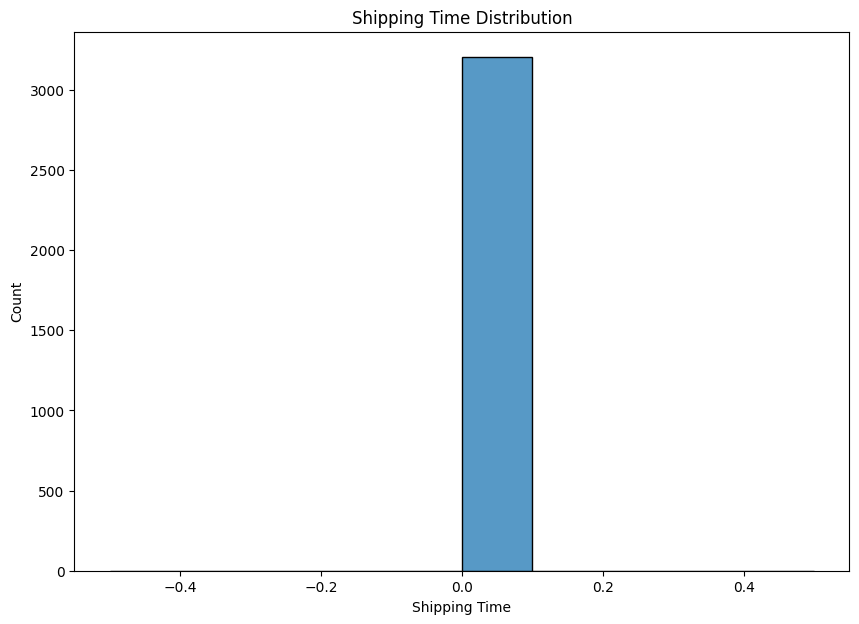

In [97]:
figure = plt.figure(figsize=(10,7))
walmart_data['Shipping Time'] = (walmart_data['Ship Date'] - walmart_data['Order Date']).dt.days

sns.histplot(walmart_data['Shipping Time'], bins=10)
plt.title('Shipping Time Distribution')


**Sales vs Profit**

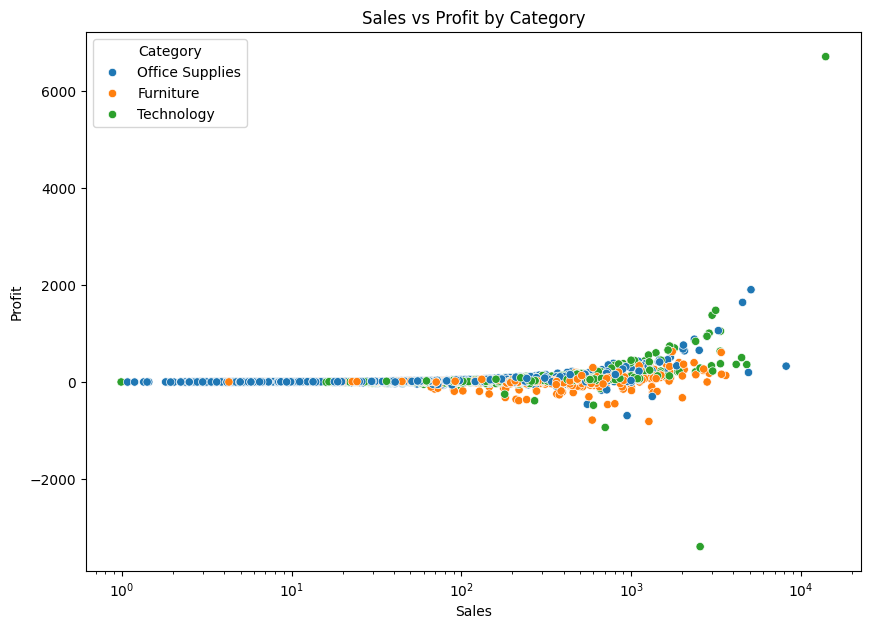

In [99]:
figure = plt.figure(figsize=(10,7))
sns.scatterplot(data=walmart_data, x='Sales', y='Profit', hue='Category')
plt.title("Sales vs Profit by Category")
plt.xscale('log')  # Optional: use if sales are highly skewed

**Quantity vs Discount**

Text(0.5, 1.0, 'Discount vs Quantity Ordered')

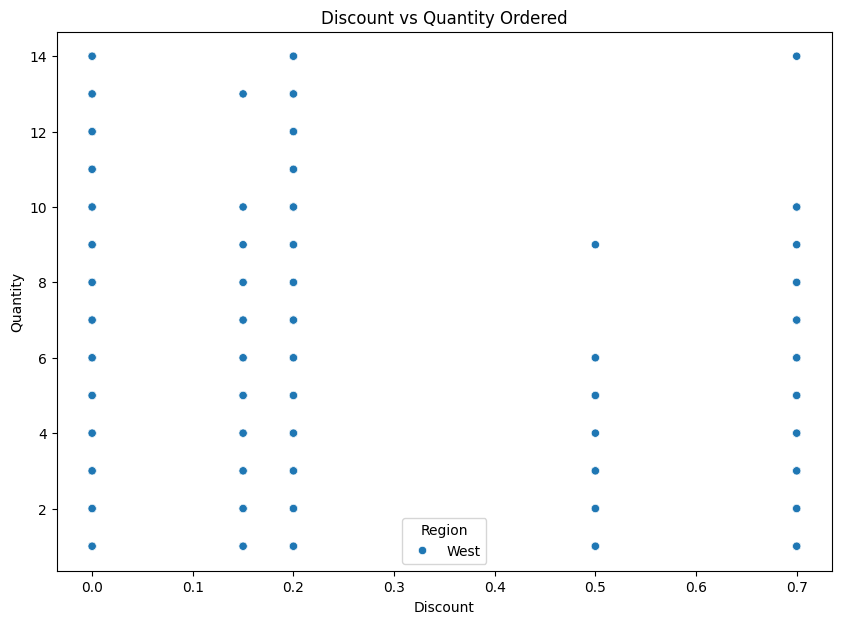

In [100]:
figure = plt.figure(figsize=(10,7))
sns.scatterplot(data=walmart_data, x='Discount', y='Quantity', hue='Region')
plt.title("Discount vs Quantity Ordered")

**Correlation Analysis**

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 1000x700 with 0 Axes>

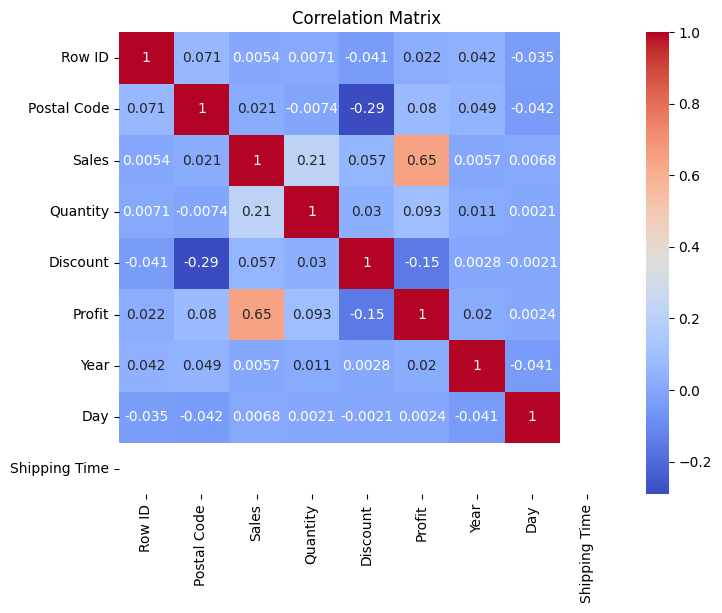

In [101]:
figure = plt.figure(figsize=(10,7))
# Only numerical columns
num_cols = walmart_data.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

**State-wise Sales and Profit**

Text(0.5, 1.0, 'Top 15 States by Sales & Profit')

<Figure size 1000x700 with 0 Axes>

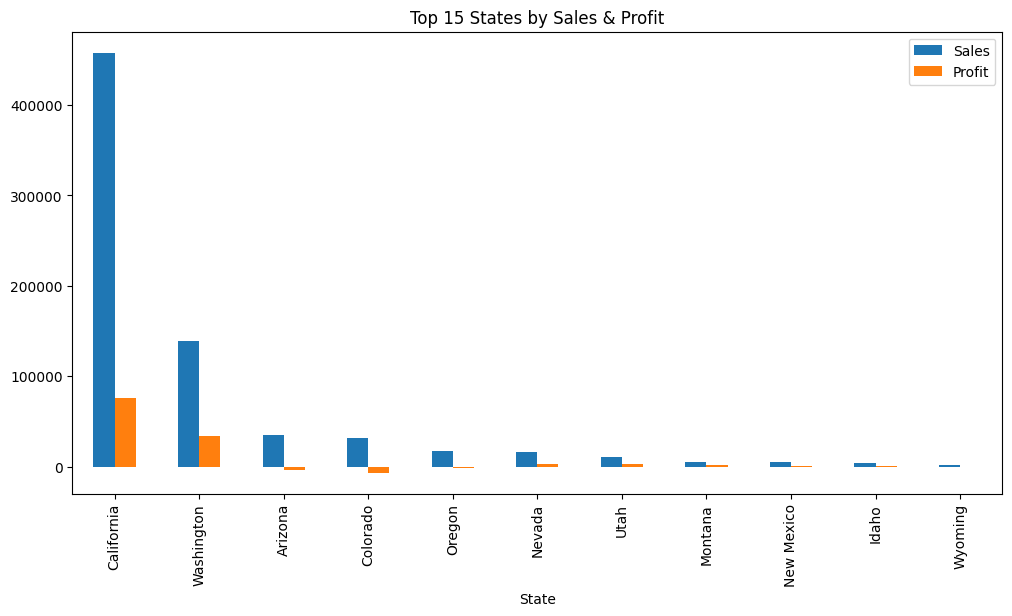

In [102]:
figure = plt.figure(figsize=(10,7))
state_sales = walmart_data.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(15)

state_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Top 15 States by Sales & Profit")

**High Discount, Low Profit Analysis**

In [103]:
figure = plt.figure(figsize=(10,7))
# Transactions with high discount but low/no profit
high_discount_low_profit = walmart_data[(walmart_data['Discount'] > 0.4) & (walmart_data['Profit'] < 0)]

print(high_discount_low_profit[['Product Name', 'Category', 'Discount', 'Profit']].head(10))


                                          Product Name         Category  \
28   Flexible Leather- Look Classic Collection Ring...  Office Supplies   
32   Avery Trapezoid Ring Binder, 3" Capacity, Blac...  Office Supplies   
34         Avery Durable Slant Ring Binders, No Labels  Office Supplies   
64   BoxOffice By Design Rectangular and Half-Moon ...        Furniture   
87       Ibico Laser Imprintable Binding System Covers  Office Supplies   
104         Wilson Jones Custom Binder Spines & Labels  Office Supplies   
134  Bush Advantage Collection Racetrack Conference...        Furniture   
135                         Poly Designer Cover & Back  Office Supplies   
154                       Vinyl Sectional Post Binders  Office Supplies   
155                   GBC Standard Therm-A-Bind Covers  Office Supplies   

     Discount    Profit  
28        0.7   -3.7880  
32        0.7  -25.8174  
34        0.7   -1.8308  
64        0.5 -161.8750  
87        0.7  -62.8800  
104       0.7   -5

<Figure size 1000x700 with 0 Axes>

**Monthly Sales/Profit Trend by Year**

Text(0.5, 1.0, 'Profit by Category and Region')

<Figure size 1000x700 with 0 Axes>

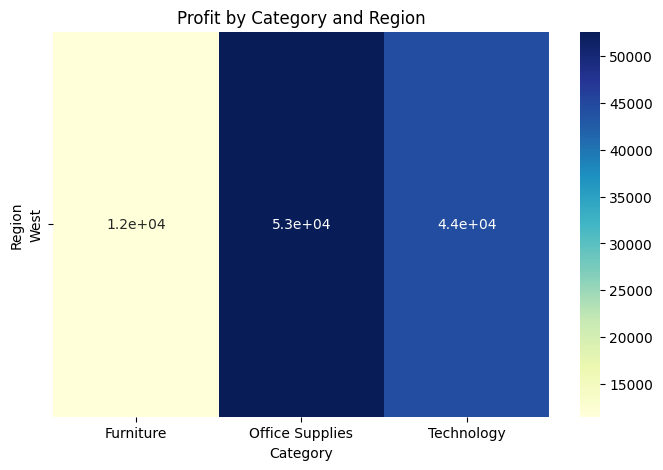

In [106]:
figure = plt.figure(figsize=(10,7))
heatmap_data = walmart_data.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title("Profit by Category and Region")


**Loss Analysis: Worst Performing Products**

Text(0.5, 1.0, 'Top 10 Loss-Making Products')

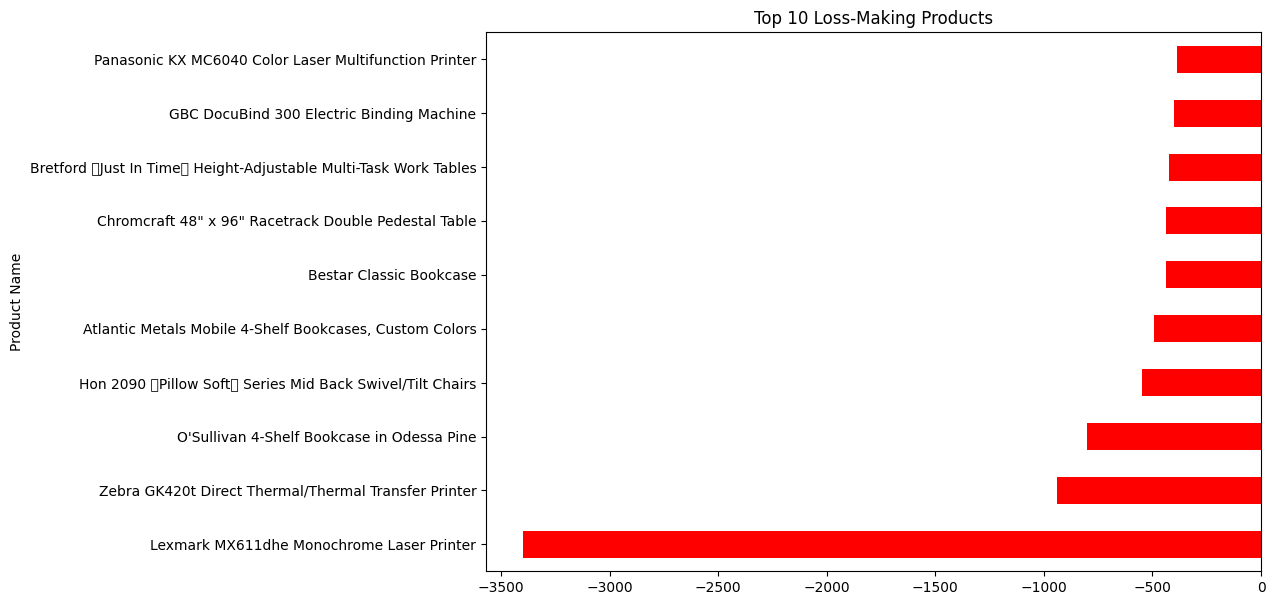

In [107]:
figure = plt.figure(figsize=(10,7))
worst_products = walmart_data.groupby('Product Name')['Profit'].sum().nsmallest(10)

worst_products.plot(kind='barh', color='red')
plt.title("Top 10 Loss-Making Products")

<a name = Section9></a>

---
# **Summarization**
---

<a name = Section91></a>
### **Key Insights:**

- **Profit Distribution :** Profit is highly skewed. A few transactions generate high profits while many yield marginal or negative returns.

- **Loss-Making Categories / Sub-Categories :** Some sub-categories (like Tables or Bookcases, for example) show consistent negative total profit.

- **High Discount, Low Profit :** Discounts above 40% often correlate with net losses, especially in furniture and technology.

- **Regional Profitability :** Certain regions (e.g., Central or South) consistently perform worse in terms of profit.

- **Shipping Time and Customer Experience :** Some product categories experience longer shipping times, with potential delays of 5+ days.

- **Top Products by Sales ≠ Top Products by Profit :** High-selling products do not always contribute the most profit.

- **Time Trends :** Sales peak during certain months (e.g., November–December), indicating strong seasonal demand.

<a name = Section92></a>
### **Business Recommendations**

- Investigate suppliers, pricing models, and discount strategies for those sub-categories. Consider promotions only if they lead to long-term customer retention.

- Set a maximum discount threshold. Use targeted promotions instead of blanket discounts.

- Re-evaluate logistics, demand forecasting, and regional marketing strategies in underperforming areas.

- Work with logistics to optimize fulfillment centers, especially for slower categories. Communicate estimated delivery times clearly on the platform.

- Combine sales velocity and unit margin to evaluate overall contribution. Focus marketing on high-profit, moderate-volume items.

- Plan seasonal inventory, staffing, and marketing campaigns ahead of peak periods.